In [1]:
import requests 
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#my dictionary to create my dataframe

review_dict = {'name':[], 'date':[], 'rating':[], 'review':[]}

In [3]:
#working on the html

for page in range(0,29): 
    url = 'https://www.metacritic.com/game/switch/pokemon-sword/user-reviews?page='+str(page)  #updating the number of pages 
    user_agent = {'User-agent': 'Mozilla/5.0'}
    response  = requests.get(url, headers = user_agent)
    soup = BeautifulSoup(response.text, 'html.parser')
    
    for review in soup.find_all('div', class_='review_content'):
        if review.find('div', class_='name') == None:
                       break 
        review_dict['name'].append(review.find('div', class_='name').find('a').text)
        review_dict['date'].append(review.find('div', class_='date').text)
        review_dict['rating'].append(review.find('div', class_='review_grade').find_all('div')[0].text)
        if review.find('span', class_='blurb blurb_expanded'):
            review_dict['review'].append(review.find('span', class_='blurb blurb_expanded').text)
        else:
            review_dict['review'].append(review.find('div', class_='review_body').find('span').text)

df = pd.DataFrame(review_dict)  

In [4]:
df

,name,date,rating,review
0,Spaxe,"Nov 15, 2019",5,My copy of Sword and Shield came in the mail a...
1,Zerato,"Nov 15, 2019",5,The game is meh not even counting the Pokemon ...
2,Ninjasuite,"Nov 15, 2019",3,This is what happen if a company realize that ...
3,Alvertin,"Nov 15, 2019",3,I really wish the games were good. I don't lea...
4,Mrich747,"Nov 15, 2019",0,"The critics calling Sword and Sheild ""the best..."
...,...,...,...,...
2854,Timberx2,"Feb 1, 2022",9,I genuinely don't understand the hate for this...
2855,reneatseyes,"Feb 13, 2022",3,The game is alright. Fundamentally it’s a poké...
2856,Salt_addict,"Feb 14, 2022",5,Long term pokemon player: maybe i've out grown...
2857,Whoopin,"Feb 27, 2022",1,Shameless cash grab from a billion-dollar fran...


In [5]:
#changing the date column from string to datetime

df['date']=pd.to_datetime(df['date'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2859 entries, 0 to 2858
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   name    2859 non-null   object        
 1   date    2859 non-null   datetime64[ns]
 2   rating  2859 non-null   object        
 3   review  2859 non-null   object        
dtypes: datetime64[ns](1), object(3)
memory usage: 89.5+ KB


In [7]:
#changing the ratings from string to integer

df['rating'] = df['rating'].astype(int)
#sword_reviews['rating'] = pd.to_numeric(sword_reviews['rating'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2859 entries, 0 to 2858
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   name    2859 non-null   object        
 1   date    2859 non-null   datetime64[ns]
 2   rating  2859 non-null   int32         
 3   review  2859 non-null   object        
dtypes: datetime64[ns](1), int32(1), object(2)
memory usage: 78.3+ KB


In [9]:
df.describe()


,rating
count,2859.000000
mean,4.270024
std,3.698748
min,0.000000
25%,1.000000
50%,4.000000
75%,8.000000
max,10.000000


This shows that the average raing is 4.27

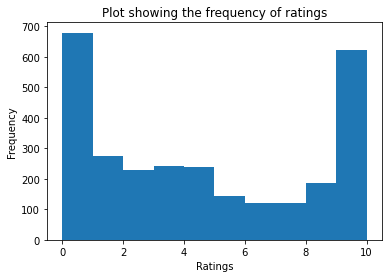

In [10]:
plt.hist(df['rating'],bins=10)
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.title('Plot showing the frequency of ratings');

The histogram above shows that there were more ratings of 0 and 10 while other ratings were far lower

In [11]:
df['rating'].value_counts().sort_values(ascending = False)

0     679
10    415
1     276
3     241
4     239
2     230
9     206
8     187
5     144
6     121
7     121
Name: rating, dtype: int64

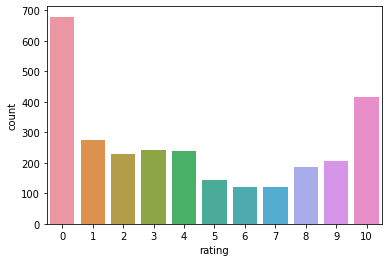

In [12]:
#count plot showing the frequency of occurences of the ratings
sns.countplot(x='rating',data=df);

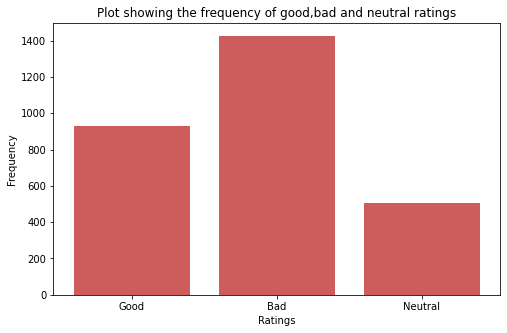

In [13]:
#separating the ratings into good, bad and neutral.
# good ratings are between 7 to 10 inclusive
# bad ratings are from 0 to 3 inclusive
# neutral ratings are just between 3 to 7 exclusive
good = []
bad = []
neutral = []

for rating in df['rating']:
    if rating >= 7:
        good.append(rating)
    elif rating <= 3:
        bad.append(rating)
    elif rating > 3 and rating < 7:
        neutral.append(rating)
        
good_ratings = len(good)
bad_ratings = len(bad)
neutral_ratings = len(neutral)

#plotting 
plt.figure(figsize=(8,5))
plt.bar(x= ['Good','Bad','Neutral'],height = [good_ratings,bad_ratings,neutral_ratings],color = 'indianred')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.title('Plot showing the frequency of good,bad and neutral ratings');

After classifying the reviews into good, bad and neutral ratings.

Most reviews are in the bad category and good category while only a few people were neutral 

In [15]:
df['year'] = pd.DatetimeIndex(df['date']).year

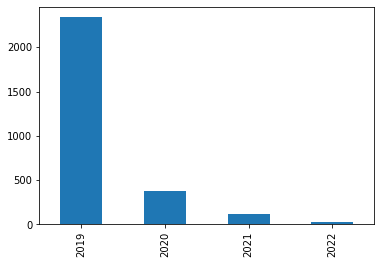

In [17]:
df['year'].value_counts().plot(
kind = 'bar');

This shows that most of our data was obtained in 2019, hence it was a trending topic in 2019

There were few reviews from users in 2020,2021 and 2022. Users that gave their reviews at this time are likely to have been the ones that had complaint when using the product after it had been lauched and criticized.